In [1]:
import math
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../test_assets/AttributeCrossPairs/vgg_covariance_matrix_results.log',header=None,sep='\s+',names=['p1','p2','acc','tpr', 'fpr', 'fnr', 'tnr'])
print(data.shape)
import math
data['fpr_log'] = data['fpr'].apply(lambda x:  0 if x == 0 else  math.log10(x) )
data_sym = pd.concat([data[['p1','p2','fpr_log']],data[['p2','p1','fpr_log']].rename(columns={'p2':'p1','p1':'p2'})],axis=0, ignore_index=True)
data_sym.head()

(441, 7)


,p1,p2,fpr_log
0,Monolid,Monolid,-1.787812
1,Monolid,Other,-2.795880
2,Monolid,narrow,-2.327902
3,Monolid,wide,-2.638272
4,bald,Monolid,-1.815309


In [3]:
renaming = {'Monolid':'monolid eye',
 'bald':'bald',
 'big' : 'full lips',
 'black' :'black hair',
 'blonde':'blonde hair',
 'brown':'brown hair',
 'curly':'curly hair',
 'gray':'gray hair',
 'red':'red hair',
 'small':'small lips',
 'straight':'straight hair',
 'type1': 'type 1 skin',
 'type2':'type 2 skin',
 'type3':'type 3 skin',
 'type4':'type 4 skin',
 'type5':'type 5 skin',
 'type6':'type 6 skin',
 'wavy':'wavy hair',
 'Other': 'other eye',
 'narrow': 'narrow nose',
 'wide':'wide nose'
 }

In [4]:
data_sym['p1'] = data_sym['p1'].replace(renaming).str.title()
data_sym['p2'] = data_sym['p2'].replace(renaming).str.title()

In [5]:
def triu_anti(m, k=0):
    m = np.asanyarray(m)
    mask = np.fliplr(np.tri(*m.shape[-2:], k=k-1, dtype=bool))
    return np.where(mask, np.zeros(1, m.dtype), m)

In [6]:
order = [
'Type 6 Skin',
'Type 5 Skin',
'Type 4 Skin',
'Type 3 Skin',
'Type 2 Skin',
'Monolid Eye',
'Other Eye',
'Narrow Nose',
'Wide Nose', 
'Small Lips',
'Full Lips',
'Wavy Hair', 
'Straight Hair',
'Gray Hair',
'Curly Hair',
'Brown Hair',
'Blonde Hair',
'Black Hair',
'Bald',
]

In [7]:
pxd = data_sym.pivot_table(index='p2',columns='p1',values='fpr_log')
pxd = pxd.drop(index=['Type 1 Skin','Red Hair'],columns=['Type 1 Skin','Red Hair'])
pxd = pxd.reindex(order[::-1])
pxd = pxd[order]
pxd.index.name = 'Phenotype Attributes'
pxd.columns.name = 'Phenotype Attributes'
trilmask = (triu_anti(np.ones(pxd.shape,dtype=int),k=1) == 1)
pxd[trilmask] = np.nan

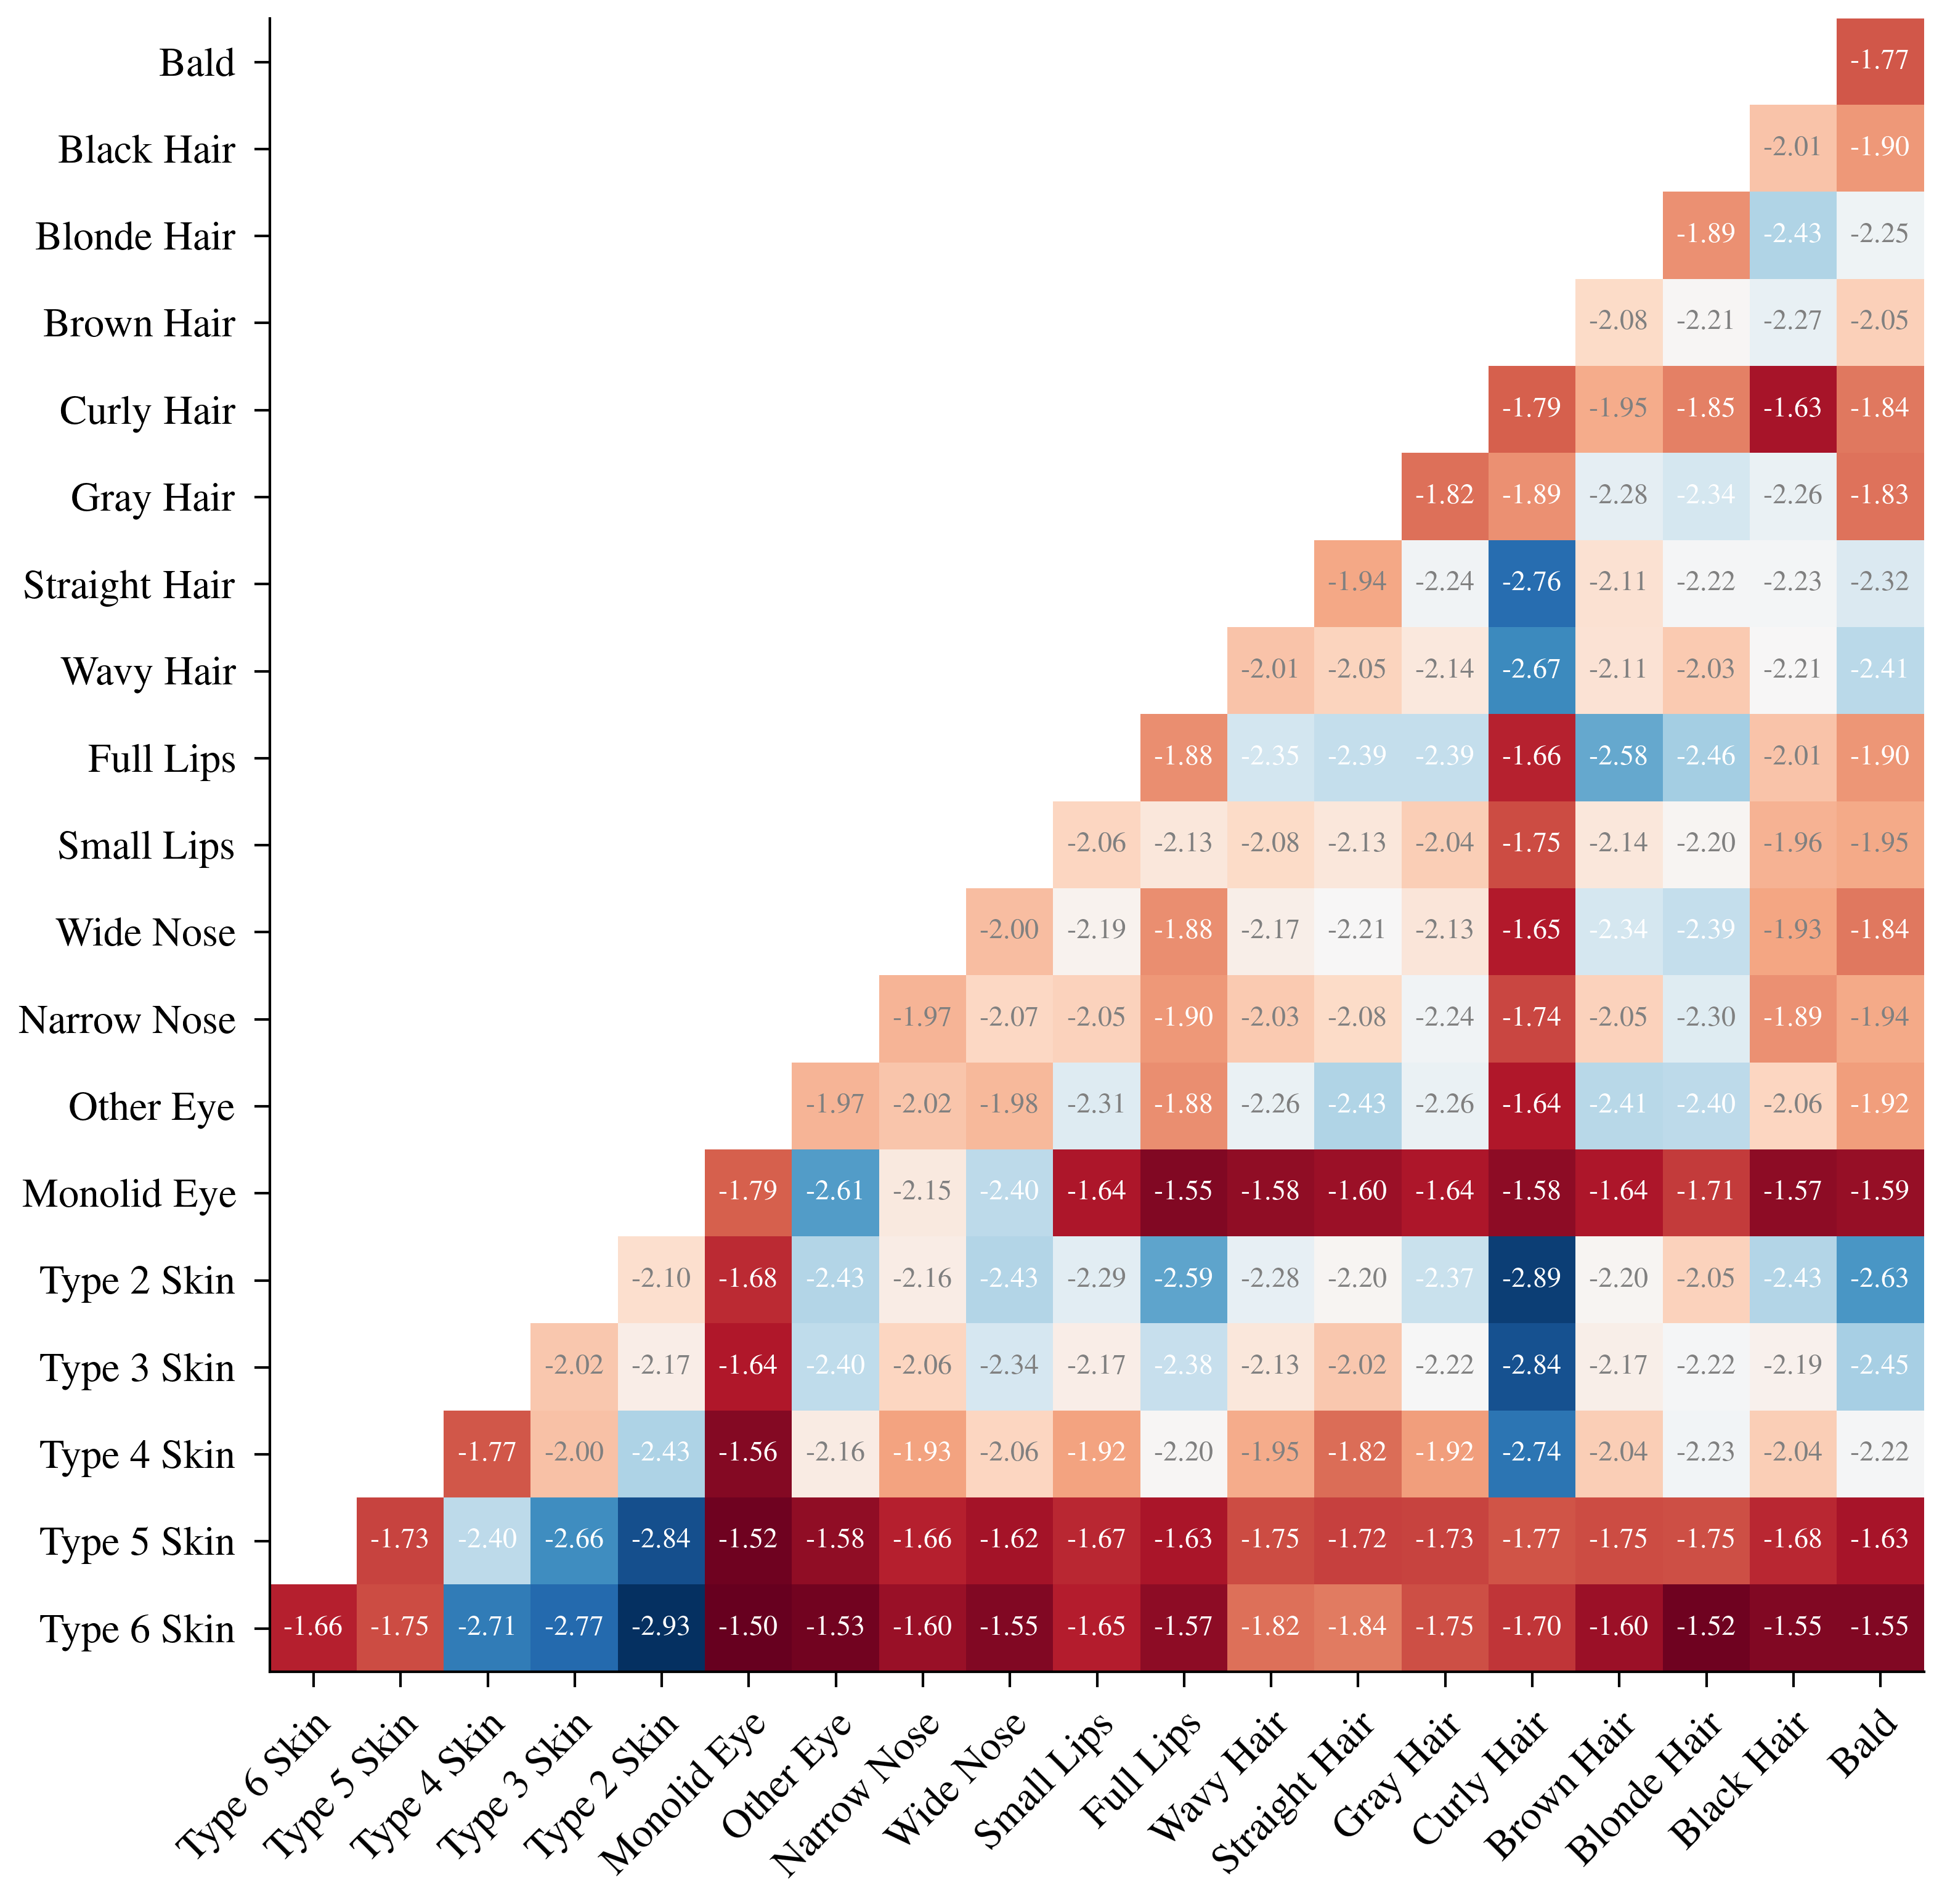

In [8]:
plt.style.use(["science", "ieee", "vibrant", "grid"])
plt.rcParams["grid.alpha"] = 0.35
plt.rcParams["grid.color"] = "#000000"
plt.rcParams["xtick.color"] = "#000000"


fig, ax = plt.subplots(figsize=(7, 5.25))
ax.autoscale(tight=True)

im = ax.imshow(pxd, cmap='RdBu_r')

# We want to show all ticks...
ax.set_xticks(np.arange(len(pxd.columns)))
ax.set_yticks(np.arange(len(pxd.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(pxd.columns)
ax.set_yticklabels(pxd.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

vals = pxd.values
# Loop over data dimensions and create text annotations.
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        text_color = 'w'
        if -1.93 > vals[i, j] > -2.34:
            text_color = 'gray'
        text = ax.text(j, i,"{:.2f}".format(vals[i, j]),
                       ha="center", va="center", color=text_color,fontsize='x-small')

# ax.set_title("asdasdas")
fig.tight_layout()

ax.grid(False)
ax.set_axisbelow(True)
ax.tick_params(which='minor', width=0, direction = 'out')
ax.tick_params(which='major', direction = 'out')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# fig.savefig('matched-covariance.pdf',dpi=300)

fig.savefig('../matched-covariance.svg',dpi=200)
#fig.savefig('matched-covariance.png',dpi=3000)
plt.show()